In [1]:
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List
from itertools import permutations

In [2]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray) -> int: 
    return np.sum(np.abs(arr - sorted_arr))

In [3]:
@njit
def insertion_1(arr: np.ndarray) -> List:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))  # Initial score before sorting

    for outer in range(1, n):
        inner = outer
        while inner > 0 and arr[inner] < arr[inner - 1]:
            arr[inner], arr[inner - 1] = arr[inner - 1], arr[inner]
            inner -= 1

        scores.append(footman(arr, sorted_order))  # Score after completing the outer loop iteration

    return scores


In [4]:
@njit
def insertion_2(arr: np.ndarray) -> List:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()

    scores.append(footman(arr, sorted_order))  # Initial score before sorting

    for outer in range(1, n):
        inner = outer
        temp = arr[inner]

        while inner > 0 and temp < arr[inner - 1]:
            arr[inner] = arr[inner - 1]  # shift right
            inner -= 1

        arr[inner] = temp

        scores.append(footman(arr, sorted_order))  # Record score *after* insertion

    return scores


In [5]:
def sim(arr_size: int, sort_func: Callable = None)-> Tuple[np.ndarray, List[np.ndarray]]:
    scores_of_scores = []
    arr = np.arange(arr_size)
    perm = permutations(arr)
    for p in perm:
        scores = sort_func(np.array(p))
        scores_of_scores.append(scores)

    max_len = max(len(s) for s in scores_of_scores)
    padded_scores = np.array([
        np.pad(s, (0, max_len - len(s)), 'edge') for s in scores_of_scores
    ])

    return padded_scores

In [6]:
def calc_worst_score(n: int, m:int)->int:
    count = 0
    if m == 0:
        x_vals = np.arange(1, n + 1)           # [1, 2, ..., n]
        x_vals_rev = x_vals[::-1]             # [n, ..., 2, 1]
        return footman(x_vals_rev, x_vals)    # Compare reversed to sorted
    for _ in range(0,m+1):
        count += abs(n-m-1)
    for i in range(0,n-m-1): # summation from i = 0 to i = n - m - 1
        score = abs(
            n-(2*m)-3-(2*i)
            )
        count += score
    return count 

In [29]:
def plot_algorithms(
    functions: List[Callable],
    names: List[str],
    arr_size: int,
    include_worst: bool = True
):
    assert len(functions) == len(names), "Each function must have a corresponding name"

    colors = ['blue', 'green', 'red', 'purple', 'orange']
    x_vals = np.arange(arr_size)
    for i, (func, name) in enumerate(zip(functions, names)):
        scores = sim(arr_size, sort_func=func)  # shape: (iter, steps)
        steps = np.arange(scores.shape[1])
        sorted_scores =  np.sort(scores, axis = 0)

        plt.fill_between(
            steps,
            sorted_scores[-1],
            color=colors[i % len(colors)],
            alpha=0.2
        )
        mean_scores = np.mean(scores, axis=0)
        plt.plot(
            np.arange(sorted_scores[0].size),
            mean_scores,
            color=colors[i % len(colors)],
            linewidth=2,
            label=f"{name} mean"
        )
        for x, y in zip(np.arange(sorted_scores[0].size - 1), mean_scores[:-1]):
            plt.text(
                x+0.05, y+0.05,
                f"{y:.1f}",
                ha='center',
                va='bottom',
                fontsize=8,
                color=colors[i % len(colors)],
                rotation=0
            )

    if include_worst:
        worst_scores = [calc_worst_score(arr_size, m) for m in x_vals]
        # worst_scores.pop()
        plt.plot(
            np.arange(arr_size),
            worst_scores,
            color='black',
            linestyle='--',
            linewidth=2,
            label="Worst-case Spearman Footrule"
        )
        for x, y in zip(x_vals, worst_scores):
            plt.text(
                x+0.05, y+0.05,
                f"{y:.0f}",
                ha='center', va='bottom',
                fontsize=8, color='black', rotation=0
            )

    plt.xlabel('Sorting Step')
    plt.ylabel('Score')
    plt.title('Sorting Algorithms Comparison')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.text(
    0.01, 0.01,
    f"Array Size: {arr_size}",
    transform=plt.gca().transAxes
    )
    plt.tight_layout()
    plt.savefig(f"insertion_plot/insertion_{arr_size}.png")
    plt.show()


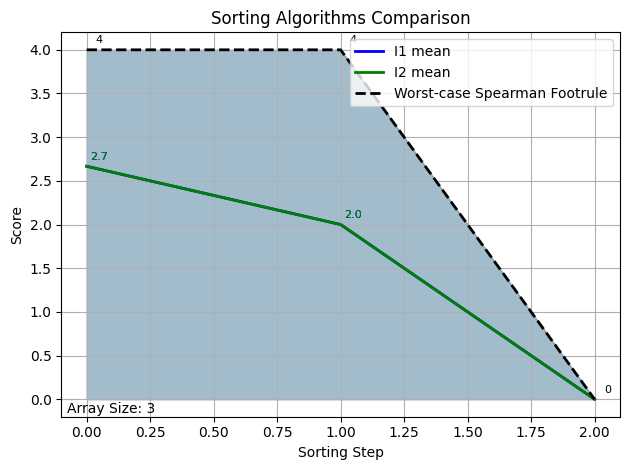

In [30]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_1)
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=3)

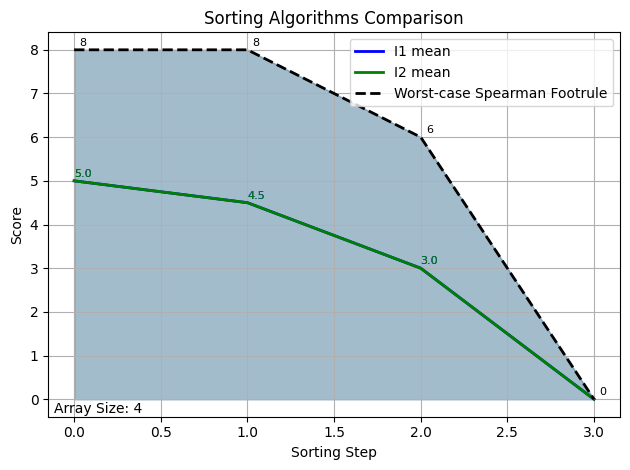

In [31]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=4)

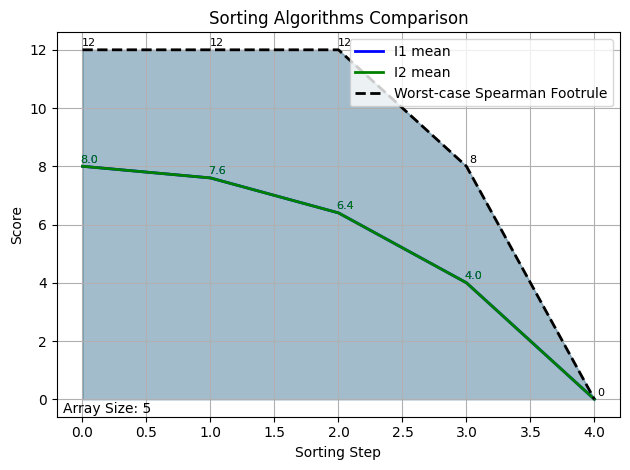

In [32]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=5)

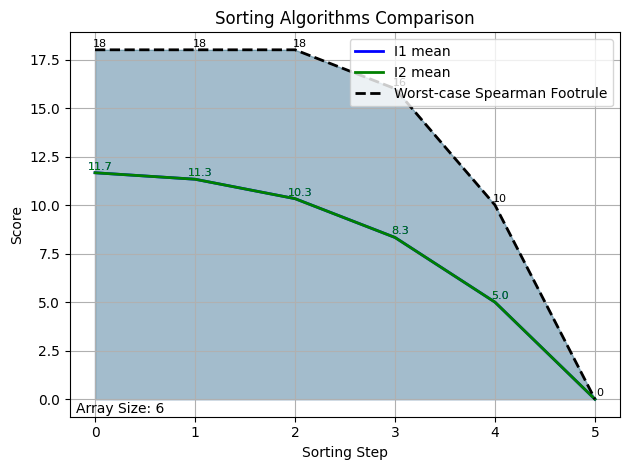

In [33]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=6)

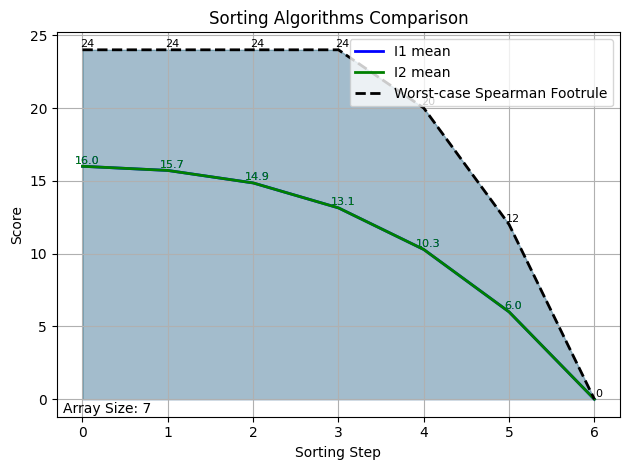

In [34]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=7)

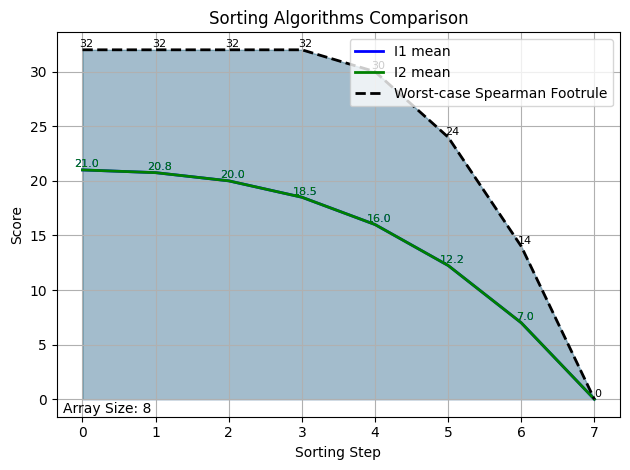

In [35]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=8)

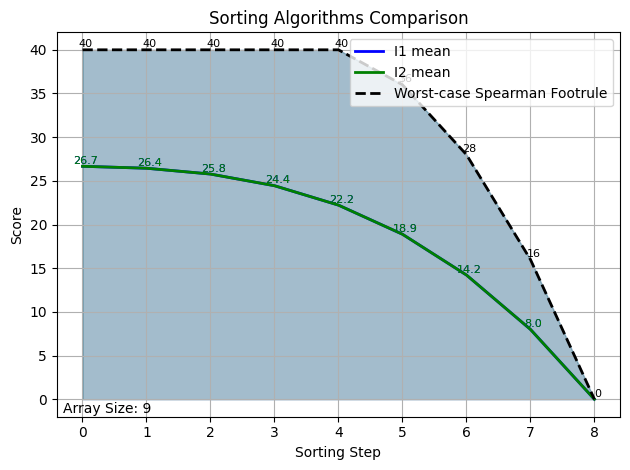

In [36]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=9)

In [ ]:
plot_algorithms([insertion_1,insertion_2],
                ["I1","I2"],
                arr_size=10)